**1. Getting the Dataset**

---



In [1]:
import keras
imdb = keras.datasets.imdb
VOCAB_SIZE = 10000
INDEX_FROM = 2
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=VOCAB_SIZE,
index_from=INDEX_FROM)

Using TensorFlow backend.


17465344/17464789 [==============================] - 10s 1us/step


Sanity check:


In [2]:
print('Sample review:', train_data[0])

Sample review: [1, 13, 21, 15, 42, 529, 972, 1621, 1384, 64, 457, 4467, 65, 3940, 3, 172, 35, 255, 4, 24, 99, 42, 837, 111, 49, 669, 2, 8, 34, 479, 283, 4, 149, 3, 171, 111, 166, 2, 335, 384, 38, 3, 171, 4535, 1110, 16, 545, 37, 12, 446, 3, 191, 49, 15, 5, 146, 2024, 18, 13, 21, 3, 1919, 4612, 468, 3, 21, 70, 86, 11, 15, 42, 529, 37, 75, 14, 12, 1246, 3, 21, 16, 514, 16, 11, 15, 625, 17, 2, 4, 61, 385, 11, 7, 315, 7, 105, 4, 3, 2222, 5243, 15, 479, 65, 3784, 32, 3, 129, 11, 15, 37, 618, 4, 24, 123, 50, 35, 134, 47, 24, 1414, 32, 5, 21, 11, 214, 27, 76, 51, 4, 13, 406, 15, 81, 2, 7, 3, 106, 116, 5951, 14, 255, 3, 2, 6, 3765, 4, 722, 35, 70, 42, 529, 475, 25, 399, 316, 45, 6, 3, 2, 1028, 12, 103, 87, 3, 380, 14, 296, 97, 31, 2070, 55, 25, 140, 5, 193, 7485, 17, 3, 225, 21, 20, 133, 475, 25, 479, 4, 143, 29, 5534, 17, 50, 35, 27, 223, 91, 24, 103, 3, 225, 64, 15, 37, 1333, 87, 11, 15, 282, 4, 15, 4471, 112, 102, 31, 14, 15, 5344, 18, 177, 31]


In [3]:
print('\n Sample label:', test_labels[1])


 Sample label: 1


**2. Readying the Inputs for the LSTM**

---



In [0]:
from keras.preprocessing.sequence import pad_sequences
MAXIMUM_LENGTH = 500

In [0]:
print('Length of sample train_data before preprocessing:', len(train_data[0]))
preprocessed_train_data=pad_sequences(train_data, maxlen=MAXIMUM_LENGTH,padding='pre', truncating='pre')
print('Length of sample train_data after preprocessing:', len(preprocessed_train_data[0]))

Length of sample train_data before preprocessing: 218
Length of sample train_data after preprocessing: 500


**3. Building the Model**

---



In [0]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.optimizers import Adam
EMBED_SIZE = 100
model = Sequential()
model.add(Embedding(input_dim=VOCAB_SIZE,
                    output_dim=EMBED_SIZE,
                    input_length=MAXIMUM_LENGTH,
                    name='layer_embedding'))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam()
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Sanity Check:

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 500, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


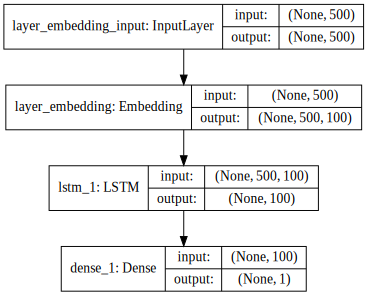

In [0]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import vis_utils
SVG(vis_utils.model_to_dot(model, show_shapes=True, show_layer_names=True, dpi = 70).create(prog='dot', format='svg'))

In [0]:
history = model.fit(preprocessed_train_data, train_labels, validation_split=0.08, epochs=3, batch_size=100)




Train on 23000 samples, validate on 2000 samples
Epoch 1/3





23000/23000 [==============================] - 193s 8ms/step - loss: 0.4585 - acc: 0.7730 - val_loss: 0.3605 - val_acc: 0.8475
Epoch 2/3
23000/23000 [==============================] - 176s 8ms/step - loss: 0.2735 - acc: 0.8914 - val_loss: 0.3401 - val_acc: 0.8680
Epoch 3/3
23000/23000 [==============================] - 173s 8ms/step - loss: 0.1926 - acc: 0.9270 - val_loss: 0.3311 - val_acc: 0.8775


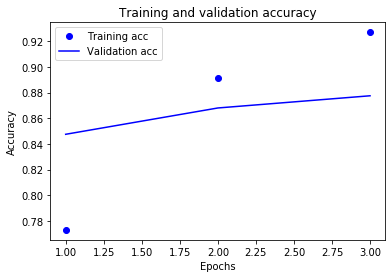

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Based on your plot, what do you think the optimal stopping point for the model should
have been?

The training should have been stopped after the second epoch. The third epoch results in overfitting

**5. Evaluating the Model on the Test Data**

---



In [0]:
processed_test_data = pad_sequences(test_data, maxlen=MAXIMUM_LENGTH,padding='pre', truncating='pre')
result = model.evaluate(processed_test_data, test_labels)

25000/25000 [==============================] - 205s 8ms/step


Sanity Check:

In [0]:
print('test_loss:', result[0], 'test_accuracy:', result[1])

test_loss: 0.3488790493965149 test_accuracy: 0.87136


**6. Extracting the Word Embeddings**

---



In [0]:
word_embeddings=model.get_layer('layer_embedding').get_weights()[0]

Sanity Check:

In [0]:
print('Shape of word_embeddings:', word_embeddings.shape)

Shape of word_embeddings: (10000, 100)


**7. Visualizing the Reviews**

---



In [0]:
word2idx = imdb.get_word_index()
word2idx = {k:(v+INDEX_FROM) for k,v in word2idx.items() if v < 9998}
word2idx["<PAD>"] = 0
word2idx["<START>"] = 1
word2idx["<UNK>"] = 2

1646592/1641221 [==============================] - 0s 0us/step


In the next line, create the idx2word map for all the words in the dataset

In [0]:
idx2word = {}
for key, value in word2idx.items():
  idx2word[value] = key

Sanity Check:

In [0]:
 print(' '.join(idx2word[idx] for idx in train_data[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [0]:
print(train_data[0])


[1, 13, 21, 15, 42, 529, 972, 1621, 1384, 64, 457, 4467, 65, 3940, 3, 172, 35, 255, 4, 24, 99, 42, 837, 111, 49, 669, 2, 8, 34, 479, 283, 4, 149, 3, 171, 111, 166, 2, 335, 384, 38, 3, 171, 4535, 1110, 16, 545, 37, 12, 446, 3, 191, 49, 15, 5, 146, 2024, 18, 13, 21, 3, 1919, 4612, 468, 3, 21, 70, 86, 11, 15, 42, 529, 37, 75, 14, 12, 1246, 3, 21, 16, 514, 16, 11, 15, 625, 17, 2, 4, 61, 385, 11, 7, 315, 7, 105, 4, 3, 2222, 5243, 15, 479, 65, 3784, 32, 3, 129, 11, 15, 37, 618, 4, 24, 123, 50, 35, 134, 47, 24, 1414, 32, 5, 21, 11, 214, 27, 76, 51, 4, 13, 406, 15, 81, 2, 7, 3, 106, 116, 5951, 14, 255, 3, 2, 6, 3765, 4, 722, 35, 70, 42, 529, 475, 25, 399, 316, 45, 6, 3, 2, 1028, 12, 103, 87, 3, 380, 14, 296, 97, 31, 2070, 55, 25, 140, 5, 193, 7485, 17, 3, 225, 21, 20, 133, 475, 25, 479, 4, 143, 29, 5534, 17, 50, 35, 27, 223, 91, 24, 103, 3, 225, 64, 15, 37, 1333, 87, 11, 15, 282, 4, 15, 4471, 112, 102, 31, 14, 15, 5344, 18, 177, 31]


**8. Visualizing the Word_Embeddings**

---



In [0]:
from pandas import DataFrame
print(DataFrame(word_embeddings, index=idx2word.values()).head(10))

                 0         1         2   ...        97        98        99
woods     -0.059868  0.026953 -0.049167  ...  0.011792  0.038532  0.035328
hanging   -0.044413  0.009408 -0.057241  ...  0.000380 -0.005337  0.029920
woody      0.049629 -0.038426  0.035118  ...  0.014367 -0.031917 -0.041423
arranged  -0.013424 -0.034181  0.024872  ... -0.021671 -0.008565 -0.006871
bringing  -0.030939  0.009025 -0.015846  ...  0.035933 -0.005328 -0.017574
wooden     0.025054 -0.020902  0.020014  ...  0.032796 -0.004242  0.046960
errors     0.014667  0.016566 -0.015824  ... -0.035367  0.005308  0.041143
dialogs   -0.030583  0.029331  0.024032  ...  0.005645  0.017115 -0.046138
kids      -0.035814  0.025183 -0.018435  ... -0.010712 -0.012915 -0.037255
uplifting -0.041833  0.033208  0.035538  ...  0.005895  0.077635 -0.035064

[10 rows x 100 columns]


**Plot the word embeddings using TSNE**

---



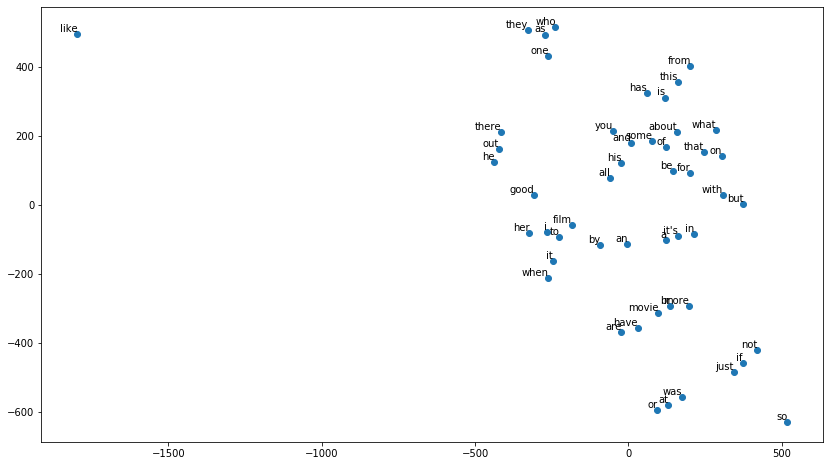

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)
start = 3
plot_only = 54
T = tsne.fit_transform(word_embeddings[start:plot_only, :])
labels = [idx2word[i] for i in range(start, plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
  plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', ha='right',va='bottom')

**9. Questions**

---



1. Create a new model that is a copy of the model step 3. To this new model, add two dropout
layers, one between the embedding layer and the LSTM layer and another between the
LSTM layer and the output layer. Repeat steps 4 and 5 for this model. What do you observe?
How about if you train this new model for 6 epochs instead?

In [0]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam
EMBED_SIZE = 100
model2 = Sequential()
model2.add(Embedding(input_dim=VOCAB_SIZE,
                    output_dim=EMBED_SIZE,
                    input_length=MAXIMUM_LENGTH,
                    name='layer_embedding'))
model2.add(Dropout(0.5))
model2.add(LSTM(100, activation='tanh'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
optimizer = Adam()
model2.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
history2 = model2.fit(preprocessed_train_data, train_labels, validation_split=0.08, epochs=3, batch_size=100)

Train on 23000 samples, validate on 2000 samples
Epoch 1/3
23000/23000 [==============================] - 181s 8ms/step - loss: 0.5088 - acc: 0.7348 - val_loss: 0.4371 - val_acc: 0.8105
Epoch 2/3
23000/23000 [==============================] - 175s 8ms/step - loss: 0.3048 - acc: 0.8794 - val_loss: 0.3229 - val_acc: 0.8710
Epoch 3/3
23000/23000 [==============================] - 172s 7ms/step - loss: 0.2522 - acc: 0.9032 - val_loss: 0.3320 - val_acc: 0.8685


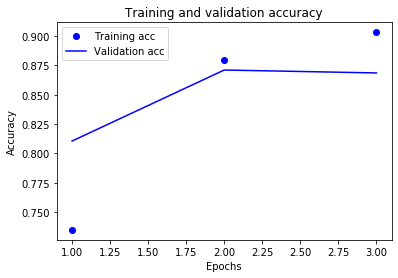

In [0]:
import matplotlib.pyplot as plt

history_dict = history2.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
processed_test_data = pad_sequences(test_data, maxlen=MAXIMUM_LENGTH,padding='pre', truncating='pre')
result = model2.evaluate(processed_test_data, test_labels)
print('test_loss:', result[0], 'test_accuracy:', result[1])

25000/25000 [==============================] - 222s 9ms/step
test_loss: 0.3377531599521637 test_accuracy: 0.86488


it can be observed that by adding two dropout layer, the overfitting of the model reduced. The train accuracy for the first model was 0.92 and the second model is 0.90. The gap between the training accuracy and validation accuracy decreased.

In [0]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam
EMBED_SIZE = 100
model3 = Sequential()
model3.add(Embedding(input_dim=VOCAB_SIZE,
                    output_dim=EMBED_SIZE,
                    input_length=MAXIMUM_LENGTH,
                    name='layer_embedding'))
model3.add(Dropout(0.5))
model3.add(LSTM(100, activation='tanh'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))
optimizer = Adam()
model3.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [0]:
history3 = model3.fit(preprocessed_train_data, train_labels, validation_split=0.08, epochs=6, batch_size=100)

Train on 23000 samples, validate on 2000 samples
Epoch 1/6
23000/23000 [==============================] - 179s 8ms/step - loss: 0.4852 - acc: 0.7581 - val_loss: 0.3196 - val_acc: 0.8645
Epoch 2/6
23000/23000 [==============================] - 175s 8ms/step - loss: 0.2610 - acc: 0.8984 - val_loss: 0.3009 - val_acc: 0.8725
Epoch 3/6
23000/23000 [==============================] - 179s 8ms/step - loss: 0.2144 - acc: 0.9180 - val_loss: 0.3650 - val_acc: 0.8465
Epoch 4/6
23000/23000 [==============================] - 177s 8ms/step - loss: 0.1810 - acc: 0.9334 - val_loss: 0.3238 - val_acc: 0.8770
Epoch 5/6
23000/23000 [==============================] - 176s 8ms/step - loss: 0.1407 - acc: 0.9502 - val_loss: 0.3383 - val_acc: 0.8760
Epoch 6/6
23000/23000 [==============================] - 175s 8ms/step - loss: 0.1205 - acc: 0.9577 - val_loss: 0.3778 - val_acc: 0.8725


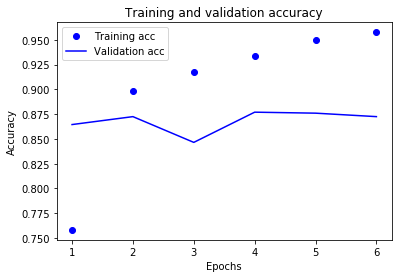

In [0]:
import matplotlib.pyplot as plt

history_dict = history3.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
result = model3.evaluate(processed_test_data, test_labels)
print('test_loss:', result[0], 'test_accuracy:', result[1])

25000/25000 [==============================] - 230s 9ms/step
test_loss: 0.40340055977582934 test_accuracy: 0.86072


Training the model for 6 epoch doesn't change the test accuracy a lot. But the train accuracy increases to 95% which shows overfitting when compared to the previous model.

2. Experiment with compiling the model with batch sizes of 1, 32, len(training_data). What do
you observe?


In [0]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam
EMBED_SIZE = 100
model4 = Sequential()
model4.add(Embedding(input_dim=VOCAB_SIZE,
                    output_dim=EMBED_SIZE,
                    input_length=MAXIMUM_LENGTH,
                    name='layer_embedding'))
model4.add(LSTM(100, activation='tanh'))
model4.add(Dense(1, activation='sigmoid'))
optimizer = Adam()
model4.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [0]:
history4 = model4.fit(preprocessed_train_data, train_labels, validation_split=0.08, epochs=3, batch_size=32)

Different batch sizes effect the training of the model. Batch size of 1 gives the highest test accuracy but is very difficult to train as it takes a long time. The test accuracy decreases as we increase the batch size. It can be said that batch size plays an important role in generalization. The smaller the batch size, the model generalises better but it also becomes more difficult to train.

3. (optional) Can you retrain with a Bidirectional LSTM instead of an LSTM? What do you
observe about the Bi-LSTM model at 3 epochs? What about at 6 epochs?

In [0]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import Adam
EMBED_SIZE = 100
model5 = Sequential()
model5.add(Embedding(input_dim=VOCAB_SIZE,
                    output_dim=EMBED_SIZE,
                    input_length=MAXIMUM_LENGTH,
                    name='layer_embedding'))
model5.add(Bidirectional(LSTM(100, activation='tanh')))
model5.add(Dense(1, activation='sigmoid'))
optimizer = Adam()
model5.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [0]:
history5 = model5.fit(preprocessed_train_data, train_labels, validation_split=0.08, epochs=3, batch_size=100)

Train on 23000 samples, validate on 2000 samples
Epoch 1/3
23000/23000 [==============================] - 410s 18ms/step - loss: 0.4665 - acc: 0.7733 - val_loss: 0.3546 - val_acc: 0.8530
Epoch 2/3
23000/23000 [==============================] - 395s 17ms/step - loss: 0.2670 - acc: 0.8949 - val_loss: 0.3388 - val_acc: 0.8640
Epoch 3/3
23000/23000 [==============================] - 399s 17ms/step - loss: 0.1850 - acc: 0.9307 - val_loss: 0.3202 - val_acc: 0.8805


In [0]:
result = model5.evaluate(processed_test_data, test_labels)
print('test_loss:', result[0], 'test_accuracy:', result[1])

25000/25000 [==============================] - 462s 18ms/step
test_loss: 0.32195794054985044 test_accuracy: 0.87524


The test accuracy for bidirectional LSTM is more than LSTM. Therefore it can be infered that bi-LSTM are better.

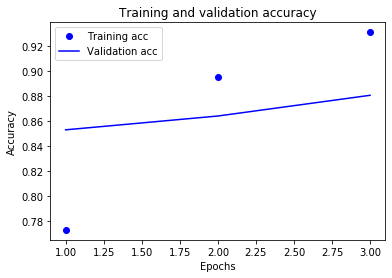

In [0]:
import matplotlib.pyplot as plt

history_dict = history5.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import Adam
EMBED_SIZE = 100
model6 = Sequential()
model6.add(Embedding(input_dim=VOCAB_SIZE,
                    output_dim=EMBED_SIZE,
                    input_length=MAXIMUM_LENGTH,
                    name='layer_embedding'))
model6.add(Bidirectional(LSTM(100, activation='tanh')))
model6.add(Dense(1, activation='sigmoid'))
optimizer = Adam()
model6.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [0]:
history6 = model6.fit(preprocessed_train_data, train_labels, validation_split=0.08, epochs=6, batch_size=100)

Train on 23000 samples, validate on 2000 samples
Epoch 1/6
23000/23000 [==============================] - 399s 17ms/step - loss: 0.4831 - acc: 0.7598 - val_loss: 0.3301 - val_acc: 0.8750
Epoch 2/6
23000/23000 [==============================] - 391s 17ms/step - loss: 0.2658 - acc: 0.8941 - val_loss: 0.3049 - val_acc: 0.8760
Epoch 3/6
23000/23000 [==============================] - 388s 17ms/step - loss: 0.1762 - acc: 0.9346 - val_loss: 0.3032 - val_acc: 0.8800
Epoch 4/6
23000/23000 [==============================] - 391s 17ms/step - loss: 0.1399 - acc: 0.9491 - val_loss: 0.3442 - val_acc: 0.8650
Epoch 5/6
23000/23000 [==============================] - 385s 17ms/step - loss: 0.1009 - acc: 0.9638 - val_loss: 0.4292 - val_acc: 0.8680
Epoch 6/6
23000/23000 [==============================] - 381s 17ms/step - loss: 0.1387 - acc: 0.9446 - val_loss: 0.4689 - val_acc: 0.8600


When the bi-LSTM is run for 6 epochs instead of 3, it can be seen that the validation accuracy starts to drop which suggests overfitting. 